United States Covid 19 Linear RMSE and Polynomial RMSE 

Linear RMSE - Cases: 1588089.590242486, Deaths: 13018.472754879856
Polynomial RMSE - Cases: 302760.64624032704, Deaths: 4666.0326780449695


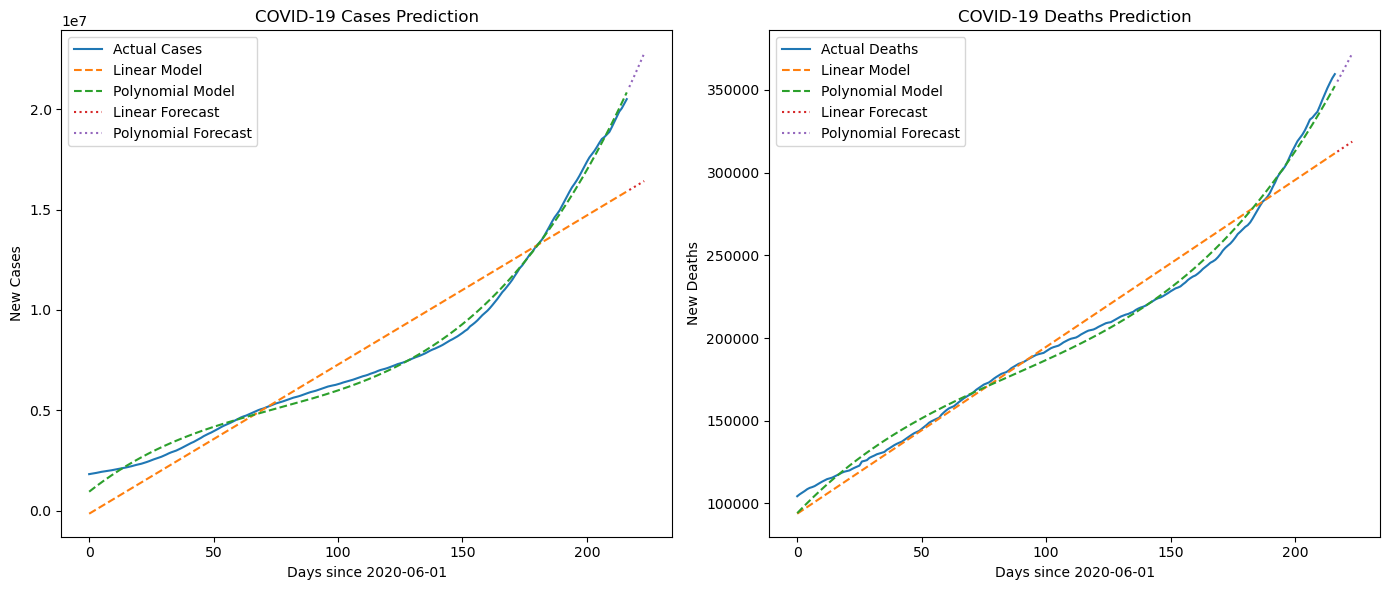

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('US-Covid.csv')

# Extract case and death columns based on column names
case_columns = [col for col in data.columns if '_cases' in col]
death_columns = [col for col in data.columns if '_deaths' in col]  # Adjust if death columns follow this format

# Transform date columns to rows
cases = data.melt(id_vars=['State', 'StateFIPS', 'population'], value_vars=case_columns,
                  var_name='date', value_name='cases')
cases['date'] = cases['date'].str.replace('_cases', '')

deaths = data.melt(id_vars=['State', 'StateFIPS', 'population'], value_vars=death_columns,
                   var_name='date', value_name='deaths')
deaths['date'] = deaths['date'].str.replace('_deaths', '')

# Merge cases and deaths
data_long = pd.merge(cases, deaths, on=['State', 'StateFIPS', 'population', 'date'])
data_long['date'] = pd.to_datetime(data_long['date'])

# Aggregate data by date to analyze across the U.S.
data_agg = data_long.groupby('date').sum().reset_index()

# Filter for the date range
start_date = '2020-06-01'
end_date = '2021-01-03'
data_agg = data_agg[(data_agg['date'] >= start_date) & (data_agg['date'] <= end_date)]

# Create X (days since start) and Y (cases, deaths)
data_agg['days_since_start'] = (data_agg['date'] - pd.to_datetime(start_date)).dt.days
X = data_agg[['days_since_start']]
y_cases = data_agg['cases']
y_deaths = data_agg['deaths']

# Step 1: Linear Regression Model
# Linear regression for cases
linear_model_cases = LinearRegression()
linear_model_cases.fit(X, y_cases)
y_cases_pred_linear = linear_model_cases.predict(X)

# Linear regression for deaths
linear_model_deaths = LinearRegression()
linear_model_deaths.fit(X, y_deaths)
y_deaths_pred_linear = linear_model_deaths.predict(X)

# Step 2: Polynomial Regression Model
# Choose a polynomial degree (e.g., degree = 3)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Polynomial regression for cases
poly_model_cases = LinearRegression()
poly_model_cases.fit(X_poly, y_cases)
y_cases_pred_poly = poly_model_cases.predict(X_poly)

# Polynomial regression for deaths
poly_model_deaths = LinearRegression()
poly_model_deaths.fit(X_poly, y_deaths)
y_deaths_pred_poly = poly_model_deaths.predict(X_poly)

# Step 3: Calculate RMSE for each model
rmse_cases_linear = np.sqrt(np.mean((y_cases - y_cases_pred_linear) ** 2))
rmse_deaths_linear = np.sqrt(np.mean((y_deaths - y_deaths_pred_linear) ** 2))
rmse_cases_poly = np.sqrt(np.mean((y_cases - y_cases_pred_poly) ** 2))
rmse_deaths_poly = np.sqrt(np.mean((y_deaths - y_deaths_pred_poly) ** 2))

print("United States Covid 19 Linear RMSE and Polynomial RMSE \n")
print(f"Linear RMSE - Cases: {rmse_cases_linear}, Deaths: {rmse_deaths_linear}")
print(f"Polynomial RMSE - Cases: {rmse_cases_poly}, Deaths: {rmse_deaths_poly}")

# Step 4: Forecasting 1 Week Ahead
# Extend the X-axis for prediction
future_days = 7
X_future = pd.DataFrame({'days_since_start': np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 1 + future_days)})
X_poly_future = poly_features.transform(X_future)

# Predict future cases and deaths
y_cases_future_linear = linear_model_cases.predict(X_future)
y_deaths_future_linear = linear_model_deaths.predict(X_future)
y_cases_future_poly = poly_model_cases.predict(X_poly_future)
y_deaths_future_poly = poly_model_deaths.predict(X_poly_future)

# Step 5: Plot the Data and Predictions
plt.figure(figsize=(14, 6))

# Cases Plot
plt.subplot(1, 2, 1)
plt.plot(data_agg['days_since_start'], y_cases, label="Actual Cases")
plt.plot(data_agg['days_since_start'], y_cases_pred_linear, label="Linear Model", linestyle="--")
plt.plot(data_agg['days_since_start'], y_cases_pred_poly, label="Polynomial Model", linestyle="--")
plt.plot(X_future['days_since_start'], y_cases_future_linear, label="Linear Forecast", linestyle=":")
plt.plot(X_future['days_since_start'], y_cases_future_poly, label="Polynomial Forecast", linestyle=":")
plt.title("COVID-19 Cases Prediction")
plt.xlabel("Days since 2020-06-01")
plt.ylabel("New Cases")
plt.legend()

# Deaths Plot
plt.subplot(1, 2, 2)
plt.plot(data_agg['days_since_start'], y_deaths, label="Actual Deaths")
plt.plot(data_agg['days_since_start'], y_deaths_pred_linear, label="Linear Model", linestyle="--")
plt.plot(data_agg['days_since_start'], y_deaths_pred_poly, label="Polynomial Model", linestyle="--")
plt.plot(X_future['days_since_start'], y_deaths_future_linear, label="Linear Forecast", linestyle=":")
plt.plot(X_future['days_since_start'], y_deaths_future_poly, label="Polynomial Forecast", linestyle=":")
plt.title("COVID-19 Deaths Prediction")
plt.xlabel("Days since 2020-06-01")
plt.ylabel("New Deaths")
plt.legend()

plt.tight_layout()
plt.show()


<h2>United States COVID-19 RMSE: Bias vs Variance Tradeoff Analysis</h2>

<h3>Linear Model</h3> 
Our linear model for the number of COVID-19 cases and deaths in the United States is highly biased, as it assumes a simple, linear relationship between the variables. This is to be expected because there are numerous factors that influence the number of COVID-19 cases and deaths. Due to this high bias, the linear model tends to underestimate the growth in numbers, resulting in "underfitting".
However, the linear model has low variance, which makes it more robust when dealing with different subsets of data. In other words, the linear model is suitable for predicting new data because it is less sensitive to outliers and small changes in the dataset.

<h3>Polynomial Model</h3> 
The polynomial model for predicting the number of COVID-19 cases and deaths in the United States has lower bias compared to the linear model, allowing it to better capture the complex relationships between variables. The lower RMSE values of <i>302,760</i> for cases and <i>4,666</i> for deaths  indicate that the polynomial model is more accurate in predicting the actual number of cases and deaths, which makes sense given the many factors that influence the spread of infectious diseases like COVID-19.
However, the polynomial model also has higher variance, meaning it is more sensitive to small changes in the data. This sensitivity can lead to overfitting, where the model becomes overly tailored to the training dataset and struggles to generalize well when presented with new data. Despite this, the polynomial model is more effective for modeling the complex dynamics between the number of cases and deaths and the underlying influencing factors.

For our United States dataset, the polynomial model would be the better choice if we had to pick one. Given the complexities involved in the spread of COVID-19, including various regional, demographic, and economic factors, the polynomial model provides a more suitable fit, capturing the nuances of growth trends in both cases and deaths.

C:\Users\bluev\AppData\Local\Temp\ipykernel_2796\1796069146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Day'] = pd.to_datetime(data_country['Day'])


Japan - Linear RMSE - Cases: 29.08691381934205, Deaths: 0.4840158843987045
Japan - Polynomial RMSE - Cases: 15.697174424298284, Deaths: 0.27073406077621576


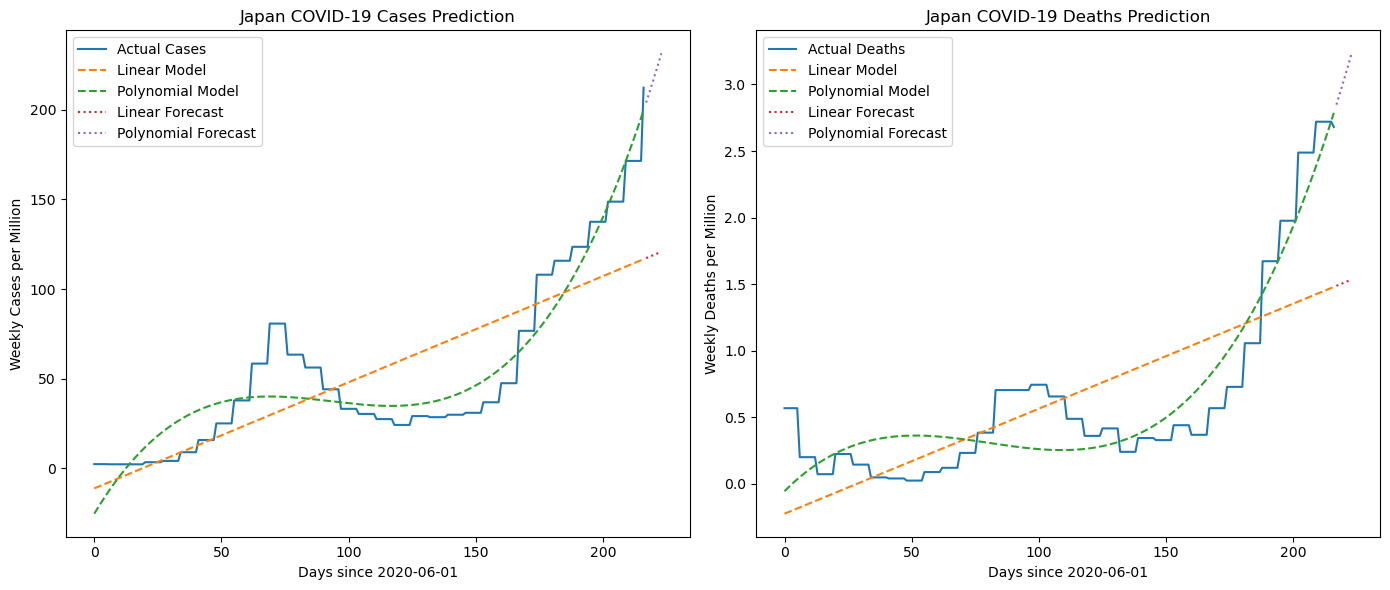

C:\Users\bluev\AppData\Local\Temp\ipykernel_2796\1796069146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Day'] = pd.to_datetime(data_country['Day'])


Sweden - Linear RMSE - Cases: 878.8844479650147, Deaths: 15.776756364016004
Sweden - Polynomial RMSE - Cases: 382.46646884000626, Deaths: 3.0901704800237324


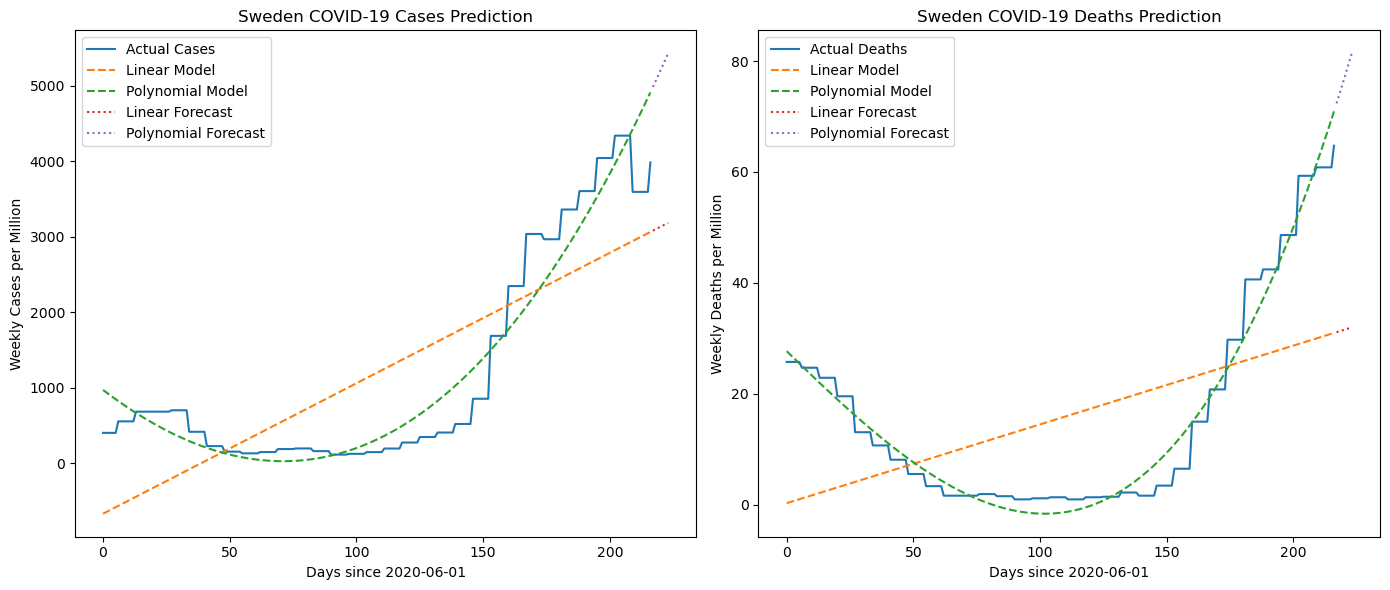

C:\Users\bluev\AppData\Local\Temp\ipykernel_2796\1796069146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Day'] = pd.to_datetime(data_country['Day'])


Brazil - Linear RMSE - Cases: 282.7877641157751, Deaths: 4.267397670809717
Brazil - Polynomial RMSE - Cases: 144.48261156839808, Deaths: 1.8867394534258082


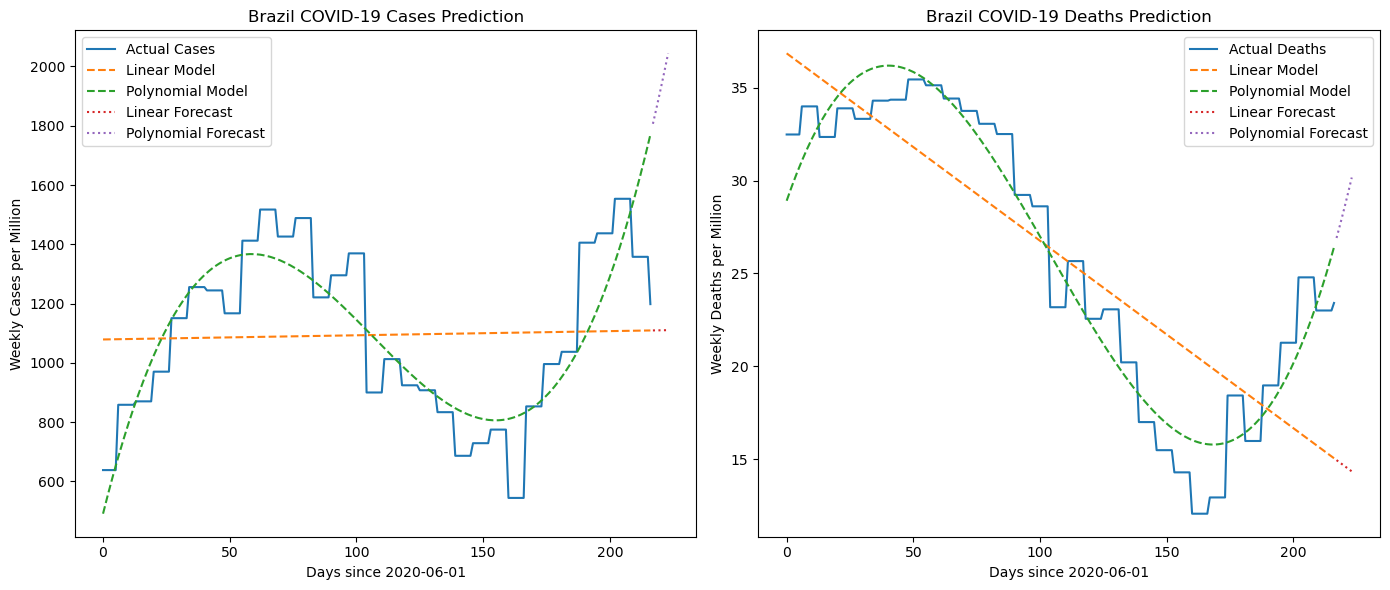

C:\Users\bluev\AppData\Local\Temp\ipykernel_2796\1796069146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Day'] = pd.to_datetime(data_country['Day'])


Australia - Linear RMSE - Cases: 34.708361723037086, Deaths: 1.4959221744638465
Australia - Polynomial RMSE - Cases: 23.33423541651187, Deaths: 1.0320501035694831


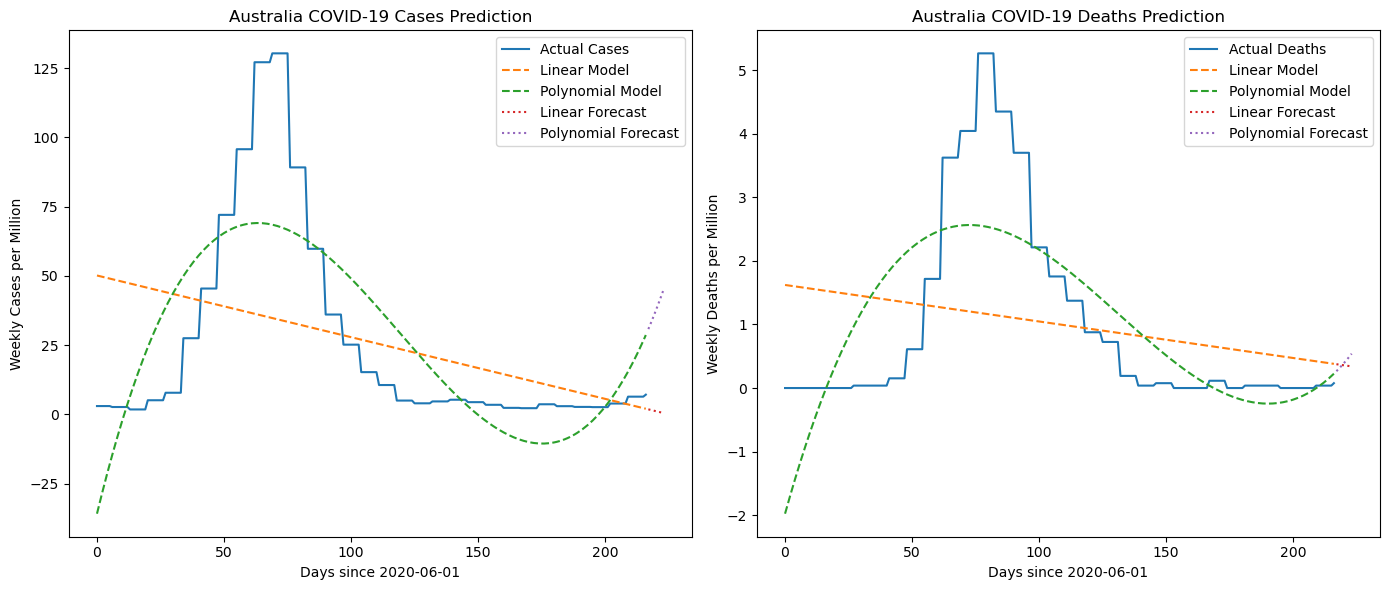

C:\Users\bluev\AppData\Local\Temp\ipykernel_2796\1796069146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Day'] = pd.to_datetime(data_country['Day'])


Germany - Linear RMSE - Cases: 338.24653203430756, Deaths: 14.130997424328745
Germany - Polynomial RMSE - Cases: 198.97558245089508, Deaths: 3.955078413073864


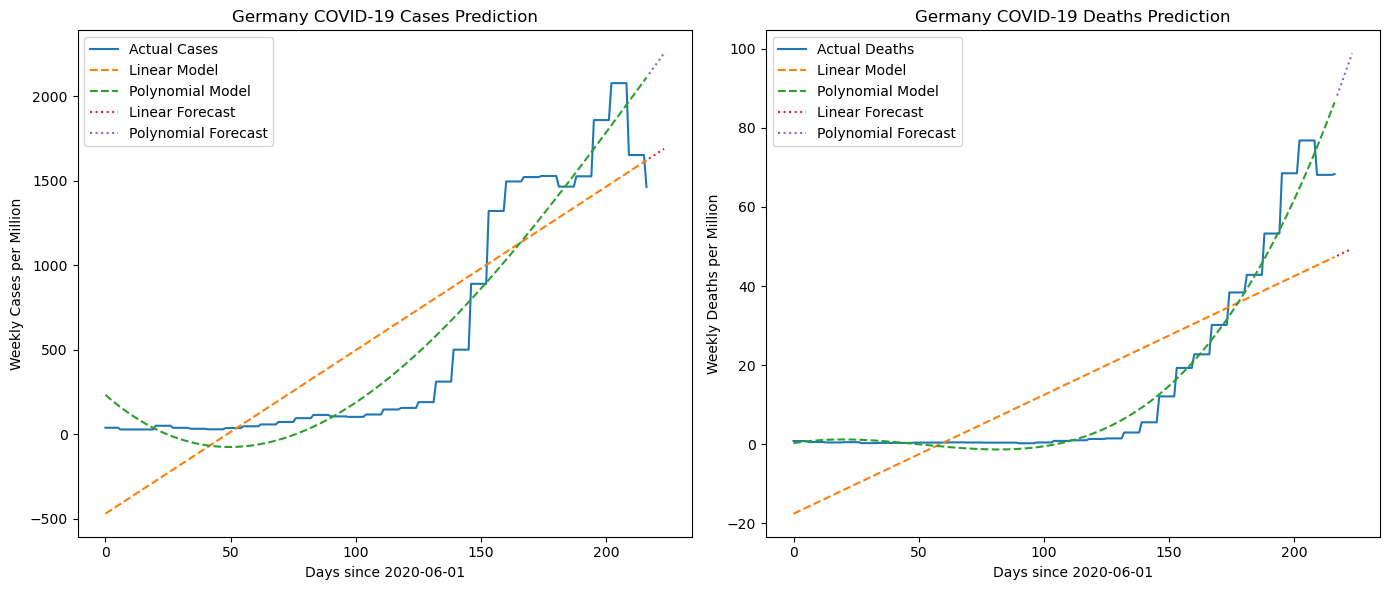

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load datasets for cases and deaths (modify paths as needed)
filtered_cases = pd.read_csv('filtered_country_cases.csv')
filtered_deaths = pd.read_csv('filtered_country_deaths.csv')

# Merge cases and deaths data on Entity, Code, and Day
data = pd.merge(filtered_cases, filtered_deaths, on=['Entity', 'Code', 'Day'])

# Define start date and date range for analysis
start_date = '2020-06-01'
end_date = '2021-01-03'
countries = ['Japan', 'Sweden', 'Brazil', 'Australia', 'Germany']

for country in countries:
    # Filter data for each country
    data_country = data[data['Entity'] == country]
    
    # Convert Day column to datetime and filter by date range
    data_country['Day'] = pd.to_datetime(data_country['Day'])
    data_country = data_country[(data_country['Day'] >= start_date) & (data_country['Day'] <= end_date)]
    
    # Prepare X (days since start) and Y (cases, deaths)
    data_country['days_since_start'] = (data_country['Day'] - pd.to_datetime(start_date)).dt.days
    X = data_country[['days_since_start']]
    y_cases = data_country['Weekly cases per million people']
    y_deaths = data_country['Weekly deaths per million people']
    
    # Linear Regression Model
    linear_model_cases = LinearRegression()
    linear_model_cases.fit(X, y_cases)
    y_cases_pred_linear = linear_model_cases.predict(X)

    linear_model_deaths = LinearRegression()
    linear_model_deaths.fit(X, y_deaths)
    y_deaths_pred_linear = linear_model_deaths.predict(X)
    
    # Polynomial Regression Model
    degree = 3
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    poly_model_cases = LinearRegression()
    poly_model_cases.fit(X_poly, y_cases)
    y_cases_pred_poly = poly_model_cases.predict(X_poly)

    poly_model_deaths = LinearRegression()
    poly_model_deaths.fit(X_poly, y_deaths)
    y_deaths_pred_poly = poly_model_deaths.predict(X_poly)

    # Calculate RMSE
    rmse_cases_linear = np.sqrt(np.mean((y_cases - y_cases_pred_linear) ** 2))
    rmse_deaths_linear = np.sqrt(np.mean((y_deaths - y_deaths_pred_linear) ** 2))
    rmse_cases_poly = np.sqrt(np.mean((y_cases - y_cases_pred_poly) ** 2))
    rmse_deaths_poly = np.sqrt(np.mean((y_deaths - y_deaths_pred_poly) ** 2))
    
    print(f"{country} - Linear RMSE - Cases: {rmse_cases_linear}, Deaths: {rmse_deaths_linear}")
    print(f"{country} - Polynomial RMSE - Cases: {rmse_cases_poly}, Deaths: {rmse_deaths_poly}")
    
    # Forecasting 1 Week Ahead
    future_days = 7
    X_future = pd.DataFrame({'days_since_start': np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 1 + future_days)})
    X_poly_future = poly_features.transform(X_future)

    y_cases_future_linear = linear_model_cases.predict(X_future)
    y_deaths_future_linear = linear_model_deaths.predict(X_future)
    y_cases_future_poly = poly_model_cases.predict(X_poly_future)
    y_deaths_future_poly = poly_model_deaths.predict(X_poly_future)
    
    # Plot the Data and Predictions
    plt.figure(figsize=(14, 6))
    
    # Cases Plot
    plt.subplot(1, 2, 1)
    plt.plot(data_country['days_since_start'], y_cases, label="Actual Cases")
    plt.plot(data_country['days_since_start'], y_cases_pred_linear, label="Linear Model", linestyle="--")
    plt.plot(data_country['days_since_start'], y_cases_pred_poly, label="Polynomial Model", linestyle="--")
    plt.plot(X_future['days_since_start'], y_cases_future_linear, label="Linear Forecast", linestyle=":")
    plt.plot(X_future['days_since_start'], y_cases_future_poly, label="Polynomial Forecast", linestyle=":")
    plt.title(f"{country} COVID-19 Cases Prediction")
    plt.xlabel("Days since 2020-06-01")
    plt.ylabel("Weekly Cases per Million")
    plt.legend()
    
    # Deaths Plot
    plt.subplot(1, 2, 2)
    plt.plot(data_country['days_since_start'], y_deaths, label="Actual Deaths")
    plt.plot(data_country['days_since_start'], y_deaths_pred_linear, label="Linear Model", linestyle="--")
    plt.plot(data_country['days_since_start'], y_deaths_pred_poly, label="Polynomial Model", linestyle="--")
    plt.plot(X_future['days_since_start'], y_deaths_future_linear, label="Linear Forecast", linestyle=":")
    plt.plot(X_future['days_since_start'], y_deaths_future_poly, label="Polynomial Forecast", linestyle=":")
    plt.title(f"{country} COVID-19 Deaths Prediction")
    plt.xlabel("Days since 2020-06-01")
    plt.ylabel("Weekly Deaths per Million")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


<h3> Japan vs US </h3>
Similar to the US, the linear model is not a good fit for predicting COVID-19 cases and deaths in Japan. The polynomial model, however, is a better fit overall. Japan is well-known for implementing strict COVID-19 protocols, such as mask mandates and travel restrictions, which helped to significantly limit the number of cases and deaths compared to the US. As a result, Japan's RMSE values are considerably lower, indicating fewer errors in the predictions and a smaller impact of the pandemic compared to the US.

<h3> Sweden vs US </h3>
The RMSE values for Sweden are notably lower compared to the US, which is expected given Sweden's significantly smaller population. The smaller RMSE values also indicate that there are fewer errors in fitting and forecasting Sweden's data compared to the US. As with the US, the polynomial model seems to be the better choice for analyzing the RMSE of Sweden's data. Interestingly, the data trends in Sweden, which first show a decline and then a subsequent rise, suggest that Sweden's initial COVID-19 measures, followed by subsequent adjustments, likely played a role in the lower RMSE values and the overall predictability of the trends.

<h3> Brazil vs US </h3>
In Brazil, the polynomial model for RMSE is also the better fit compared to the linear model, similar to what we observed in the US. However, the variation in Brazil's data—with several rises and drops in the plotted lines—could be attributed to the country's unique distribution of its population between urban and rural areas. Rural areas in Brazil, being more isolated compared to those in the US, may have experienced less intense outbreaks, contributing to more stable trends in some regions. The lower RMSE values for Brazil suggest that the models were able to better capture and predict trends, possibly due to this difference in population density and outbreak intensity.

<h3> Australia vs US </h3>
Australia's RMSE values—34.71 for linear cases and 23.33 for polynomial cases—are much lower compared to the US, indicating that Australia had a more effective response to the COVID-19 outbreak. As with other countries, the polynomial RMSE is a better fit, but the difference in fit between linear and polynomial models is not as significant as seen in other countries. The lower RMSE values for Australia can be attributed to a combination of factors: a better government response, a smaller population, and greater adherence to public health measures. These factors made the COVID-19 trends in Australia easier to predict compared to those in the US.

<h3> Germany vs US </h3>
Germany's RMSE values are significantly lower than those of the US for both linear and polynomial models of cases and deaths. Like in other countries, the polynomial model is a better fit for Germany's data due to the lower number of cases and deaths. Interestingly, Germany's polynomial model shows a sharp increase in cases and deaths after an initial decline, which could be attributed to "super-spreader events" such as gatherings during holiday seasons. This observation aligns with our findings from stage 2 of the project. Overall, if one had to choose a model to predict future trends for COVID-19 in Germany, the polynomial model would likely be the best choice.